In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,FloatType

In [8]:
spark = SparkSession.builder.appName("eda").getOrCreate()

In [9]:
spark

In [12]:
schema = StructType([
    StructField('App',
                StringType(), True),
    StructField('Category',
                StringType(), True),
    StructField('Rating',
                FloatType(), True),
    StructField('Reviews',
                IntegerType(), True),
    StructField('Size',
                FloatType(), True),
    StructField('Installs',
                IntegerType(), True),
    StructField('Type',
                StringType(), True),
    StructField('Price',
                FloatType(), True),
    StructField('Content Rating',
                StringType(), True),
    StructField('Genres',
                StringType(), True),
    StructField('Last Updated',
                StringType(), True),
    StructField('Current Ver',
                StringType(), True),
    StructField('Android Ver',
                StringType(), True),
    StructField('day',
                IntegerType(), True),
    StructField('month',
                IntegerType(), True),
    StructField('year',
                IntegerType(), True)
])

In [13]:
df = spark.read.format(
    "csv").schema(schema).option(
    "header", True).load("/config/workspace/clead_google_playstore_data copy.csv")
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Size: float (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)



In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
df.show(5)

+--------------------+--------------+------+-------+-------+--------+----+-----+--------------+--------------------+------------+------------------+-----------+---+-----+----+
|                 App|      Category|Rating|Reviews|   Size|Installs|Type|Price|Content Rating|              Genres|Last Updated|       Current Ver|Android Ver|day|month|year|
+--------------------+--------------+------+-------+-------+--------+----+-----+--------------+--------------------+------------+------------------+-----------+---+-----+----+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|19000.0|   10000|Free|  0.0|      Everyone|        Art & Design|  2018-01-07|             1.0.0|     4.0.3 |  7|    1|2018|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|14000.0|  500000|Free|  0.0|      Everyone|Art & Design;Pret...|  2018-01-15|             2.0.0|     4.0.3 | 15|    1|2018|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510| 8700.0| 5000000|Free|  0.0|      Everyone|        Art & Design|  20

In [21]:
import pandas as pd
df.toPandas().head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20.0,6.0,2018.0


In [22]:
df.toPandas().sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
3340,NETGEAR WiFi Analytics,TOOLS,4.1,9496.0,696.0,1000000.0,Free,0.0,Everyone,Tools,2014-04-25,1.0.19,2.2,25.0,4.0,2014.0


In [24]:
df.shape()

AttributeError: 'DataFrame' object has no attribute 'shape'

In [25]:
df.count()

10840

In [26]:
print((df.count(), len(df.columns)))

(10840, 16)


In [27]:
df.select([col[0] for col in df.dtypes if col[1] != 'string']).describe().show()

+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|summary|            Rating|          Reviews|              Size|           Installs|             Price|               day|             month|              year|
+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|  count|              9364|            10838|              9144|              10838|             10839|             10838|             10838|             10838|
|   mean| 4.191734297720605|444225.1924709356|21508.339238845143|1.546663900046134E7|1.4887600148534719|15.609983391769699| 6.422402657316848|2017.3996124746263|
| stddev|0.5152693805741332|2928025.838407947| 22596.59699806101| 8.50370342845836E7|50.595990194027294| 9.561379976894772|2.5784765206882225|1.1009855900018612|
|    min|               1.0|

In [29]:
df.toPandas().describe()

,Rating,Reviews,Size,Installs,Price,day,month,year
count,9364.000000,1.083800e+04,9144.000000,1.083800e+04,10839.000000,10838.000000,10838.000000,10838.000000
mean,4.191734,4.442252e+05,21508.339844,1.546664e+07,1.488760,15.609983,6.422403,2017.399612
std,0.515269,2.928026e+06,22596.595703,8.503703e+07,50.595989,9.561380,2.578477,1.100986
min,1.000000,0.000000e+00,10.000000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,4900.000000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000
50%,4.300000,2.093500e+03,13000.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,4.500000,5.470600e+04,30000.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,5000.000000,31.000000,12.000000,2018.000000


In [30]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9364 non-null   float32
 3   Reviews         10838 non-null  float64
 4   Size            9144 non-null   float32
 5   Installs        10838 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float32
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  day             10838 non-null  float64
 14  month           10838 non-null  float64
 15  year            10838 non-null  float64
dtypes: float32(3), float64(5), object(8)
memory usage: 1.2+ MB


In [31]:
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Size: float (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)



In [33]:
pd.DataFrame(df.select([col[0] for col in df.dtypes if col[1] != 'string']).describe().show())

+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|summary|            Rating|          Reviews|              Size|           Installs|             Price|               day|             month|              year|
+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|  count|              9364|            10838|              9144|              10838|             10839|             10838|             10838|             10838|
|   mean| 4.191734297720605|444225.1924709356|21508.339238845143|1.546663900046134E7|1.4887600148534719|15.609983391769699| 6.422402657316848|2017.3996124746263|
| stddev|0.5152693805741332|2928025.838407947| 22596.59699806101| 8.50370342845836E7|50.595990194027294| 9.561379976894772|2.5784765206882225|1.1009855900018612|
|    min|               1.0|

""


In [34]:
df.select([col[0] for col in df.dtypes if col[1] != 'string']).describe().show()

+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|summary|            Rating|          Reviews|              Size|           Installs|             Price|               day|             month|              year|
+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|  count|              9364|            10838|              9144|              10838|             10839|             10838|             10838|             10838|
|   mean| 4.191734297720605|444225.1924709356|21508.339238845143|1.546663900046134E7|1.4887600148534719|15.609983391769699| 6.422402657316848|2017.3996124746263|
| stddev|0.5152693805741332|2928025.838407947| 22596.59699806101| 8.50370342845836E7|50.595990194027294| 9.561379976894772|2.5784765206882225|1.1009855900018612|
|    min|               1.0|

In [37]:
df.describe().show()

+-------+--------------------+-------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+----------------+------+------------+--------------------+-----------+------------------+------------------+------------------+
|summary|                 App|     Category|            Rating|          Reviews|              Size|           Installs|             Type|             Price|  Content Rating|Genres|Last Updated|         Current Ver|Android Ver|               day|             month|              year|
+-------+--------------------+-------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+----------------+------+------------+--------------------+-----------+------------------+------------------+------------------+
|  count|               10840|        10840|              9364|            10838|              9144|              10838|            10839|       

In [38]:
df.summary().show()

+-------+--------------------+-------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+----------------+------+------------+--------------------+-----------+------------------+------------------+------------------+
|summary|                 App|     Category|            Rating|          Reviews|              Size|           Installs|             Type|             Price|  Content Rating|Genres|Last Updated|         Current Ver|Android Ver|               day|             month|              year|
+-------+--------------------+-------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+----------------+------+------------+--------------------+-----------+------------------+------------------+------------------+
|  count|               10840|        10840|              9364|            10838|              9144|              10838|            10839|       

In [43]:
(df.select([col[0] for col in df.dtypes if col[1] != 'string']).describe()).T.sort_index()

AttributeError: 'DataFrame' object has no attribute 'T'

In [45]:
df.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
App,10840,None,None,"""""""i DT"""" Fútbol. Todos Somos Técnicos.""",🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Category,10840,None,None,traffic jams,WEATHER
Rating,9364,4.191734297720605,0.5152693805741332,1.0,5.0
Reviews,10838,444225.1924709356,2928025.838407947,0,78158306
Size,9144,21508.339238845143,22596.59699806101,10.0,100000.0
Installs,10838,1.546663900046134E7,8.50370342845836E7,0,1000000000
Type,10839,52378.5,70526.12324876507,102248,Paid
Price,10839,1.4887600148534719,50.595990194027294,0.0,5000.0
Content Rating,10840,3000000.0,2828427.12474619,1000000,Unrated


In [46]:
df.toPandas().describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9364.0,4.191734e+00,5.152694e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,10838.0,4.442252e+05,2.928026e+06,0.0,38.0,2093.5,54706.0,7.815831e+07
Size,9144.0,2.150834e+04,2.259660e+04,10.0,4900.0,13000.0,30000.0,1.000000e+05
Installs,10838.0,1.546664e+07,8.503703e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10839.0,1.488760e+00,5.059599e+01,0.0,0.0,0.0,0.0,5.000000e+03
day,10838.0,1.560998e+01,9.561380e+00,1.0,6.0,16.0,24.0,3.100000e+01
month,10838.0,6.422403e+00,2.578477e+00,1.0,5.0,7.0,8.0,1.200000e+01
year,10838.0,2.017400e+03,1.100986e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [50]:
df.columns

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'day',
 'month',
 'year']

In [51]:
type(df.columns)

list

In [54]:
df.corr()

TypeError: corr() missing 2 required positional arguments: 'col1' and 'col2'

In [53]:
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation

In [56]:
df.columns

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'day',
 'month',
 'year']

In [67]:
df_corr=df.toPandas().corr()
df_corr

,Rating,Reviews,Size,Installs,Price,day,month,year
Rating,1.000000,0.068148,0.083958,0.051362,-0.021901,-0.012446,0.017231,0.137696
Reviews,0.068148,1.000000,0.238197,0.643121,-0.009669,-0.030155,0.045927,0.075553
Size,0.083958,0.238197,1.000000,0.164792,-0.022974,-0.009473,0.039362,0.215455
Installs,0.051362,0.643121,0.164792,1.000000,-0.011691,-0.053139,0.056443,0.089385
Price,-0.021901,-0.009669,-0.022974,-0.011691,1.000000,-0.008233,0.006941,-0.007890
day,-0.012446,-0.030155,-0.009473,-0.053139,-0.008233,1.000000,-0.079744,-0.016382
month,0.017231,0.045927,0.039362,0.056443,0.006941,-0.079744,1.000000,-0.187306
year,0.137696,0.075553,0.215455,0.089385,-0.007890,-0.016382,-0.187306,1.000000


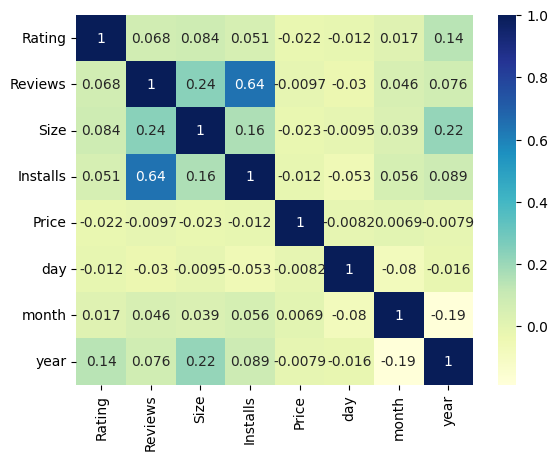

In [72]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.toPandas().corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [74]:
df.duplicated()
#df[df.duplicated()]

AttributeError: 'DataFrame' object has no attribute 'duplicated'

In [86]:
display(df)

DataFrame[App: string, Category: string, Rating: float, Reviews: int, Size: float, Installs: int, Type: string, Price: float, Content Rating: string, Genres: string, Last Updated: string, Current Ver: string, Android Ver: string, day: int, month: int, year: int]

In [82]:
df_duplicated = df.distinct()
print(df_duplicated.count())
df_duplicated.count()
df_duplicated.show()

-10358
+--------------------+-------------------+------+--------+-------+---------+----+-----+--------------+--------------------+------------+------------------+-----------+---+-----+----+
|                 App|           Category|Rating| Reviews|   Size| Installs|Type|Price|Content Rating|              Genres|Last Updated|       Current Ver|Android Ver|day|month|year|
+--------------------+-------------------+------+--------+-------+---------+----+-----+--------------+--------------------+------------+------------------+-----------+---+-----+----+
|busuu: Learn Lang...|          EDUCATION|   4.3|  206527|21000.0| 10000000|Free|  0.0|  Everyone 10+|           Education|  2018-08-01|        13.9.0.161|       5.0 |  1|    8|2018|
|           Vigo Lite|      ENTERTAINMENT|   4.2|   10291| 6500.0|  5000000|Free|  0.0|          Teen|       Entertainment|  2018-08-04|             3.7.3|     4.0.3 |  4|    8|2018|
|N1.RU - Real esta...|     HOUSE_AND_HOME|   4.5|    7619|13000.0|   100000|Fr

In [78]:
df.distinct().toPandas()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,"busuu: Learn Languages - Spanish, English & More",EDUCATION,4.3,206527.0,21000.0,10000000.0,Free,0.0,Everyone 10+,Education,2018-08-01,13.9.0.161,5.0,1.0,8.0,2018.0
1,Vigo Lite,ENTERTAINMENT,4.2,10291.0,6500.0,5000000.0,Free,0.0,Teen,Entertainment,2018-08-04,3.7.3,4.0.3,4.0,8.0,2018.0
2,"N1.RU - Real estate: apartments, new buildings...",HOUSE_AND_HOME,4.5,7619.0,13000.0,100000.0,Free,0.0,Everyone,House & Home,2018-07-12,1.22.0,4.0.3,12.0,7.0,2018.0
3,New Ringtones 2018,LIBRARIES_AND_DEMO,4.1,3781.0,36000.0,1000000.0,Free,0.0,Everyone,Libraries & Demo,2018-04-15,1.8,4.0,15.0,4.0,2018.0
4,8 Ball Pool,GAME,4.5,14201891.0,52000.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3,31.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,"Ideal Weight, BMI Calculator",HEALTH_AND_FITNESS,4.2,112384.0,5000.0,5000000.0,Free,0.0,Everyone,Health & Fitness,2018-02-23,2.1.0,4.1,23.0,2.0,2018.0
10353,Eddsworld Amino,SOCIAL,4.9,3071.0,63000.0,10000.0,Free,0.0,Teen,Social,2018-07-13,1.8.19106,4.0.3,13.0,7.0,2018.0
10354,FC Barcelona Fantasy Manager: Real football mo...,SPORTS,4.4,15221.0,30000.0,1000000.0,Free,0.0,Everyone,Sports,2017-10-02,7.30.005,4.0.3,2.0,10.0,2017.0
10355,FD VR Cardboard Featured 360 Videos,FAMILY,4.2,76.0,35000.0,10000.0,Free,0.0,Everyone,Entertainment,2017-12-19,4.5.1c,4.4,19.0,12.0,2017.0


In [87]:
import pyspark.sql.functions as f
df.groupBy(df.columns)\
    .count()\
    .where(f.col('count') > 1)\
    .select(f.sum('count'))\
    .show()

+----------+
|sum(count)|
+----------+
|       893|
+----------+



In [88]:
from pyspark.sql.functions import col
df_duplicates = df.groupBy(df.columns).count().filter(col("count")>1)

df_duplicates.show()

+--------------------+------------------+------+-------+-------+---------+----+-----+--------------+--------------------+------------+------------------+-----------+---+-----+----+-----+
|                 App|          Category|Rating|Reviews|   Size| Installs|Type|Price|Content Rating|              Genres|Last Updated|       Current Ver|Android Ver|day|month|year|count|
+--------------------+------------------+------+-------+-------+---------+----+-----+--------------+--------------------+------------+------------------+-----------+---+-----+----+-----+
|Random Video Chat...|            DATING|  null|      3| 4800.0|     1000|Free|  0.0|    Mature 17+|              Dating|  2018-07-17|                1.|       4.0 | 17|    7|2018|    2|
|All Mental disorders|           MEDICAL|   4.5|    453|11000.0|   100000|Free|  0.0|      Everyone|             Medical|  2017-07-07|               1.1|     4.0.3 |  7|    7|2017|    2|
|eBay: Buy & Sell ...|          SHOPPING|   4.4|2788923|   null|1

In [89]:
df_duplicates.count()

410

In [94]:
len(df_duplicated)

483

In [95]:
df_duplicated=df.toPandas()[df.toPandas().duplicated()]
print(len(df_duplicated))
df_duplicated

483


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,NaN,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3,26.0,2.0,2018.0
236,Box,BUSINESS,4.2,159872.0,NaN,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,NaN,31.0,7.0,2018.0
239,Google My Business,BUSINESS,4.4,70991.0,NaN,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,24.0,7.0,2018.0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37000.0,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,20.0,7.0,2018.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,NaN,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,16.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610.0,NaN,10000000.0,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,NaN,6.0,4.0,2018.0
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370.0,NaN,1000000.0,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,NaN,6.0,8.0,2018.0
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017.0,NaN,100000000.0,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,NaN,27.0,6.0,2018.0
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86000.0,10000.0,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0,1.0,6.0,2018.0


In [97]:
print((df.count(), len(df.columns)))

(10840, 16)


In [98]:
10840-10357

483

In [96]:
distinctDF = df.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

Distinct count: 10357
+-------------------------------------------------------+-------------------+------+--------+-------+---------+----+-----+--------------+-----------------------+------------+------------------+-----------+---+-----+----+
|App                                                    |Category           |Rating|Reviews |Size   |Installs |Type|Price|Content Rating|Genres                 |Last Updated|Current Ver       |Android Ver|day|month|year|
+-------------------------------------------------------+-------------------+------+--------+-------+---------+----+-----+--------------+-----------------------+------------+------------------+-----------+---+-----+----+
|busuu: Learn Languages - Spanish, English & More       |EDUCATION          |4.3   |206527  |21000.0|10000000 |Free|0.0  |Everyone 10+  |Education              |2018-08-01  |13.9.0.161        |5.0        |1  |8    |2018|
|Vigo Lite                                              |ENTERTAINMENT      |4.2   |10291   |6